In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreads-all-time-greatest-books-8k-data/Goodreads All Time Greatest Books 8k Data.csv


Goodreads
The dataset for Goodreads' All-Time Greatest Books was compiled by Goodreads, the world's largest website for readers and book recommendations.The dataset also serves as a valuable tool for researchers and scholars interested in understanding reading habits and trends.

In [2]:
#loading the dataset
df = pd.read_csv("/kaggle/input/goodreads-all-time-greatest-books-8k-data/Goodreads All Time Greatest Books 8k Data.csv")

In [3]:
#checking the first 5 rows of dataset
df.head()

,Book_Name,Author,Average_star,Ratings,Reviews,5_Star,4_Star,3_Star,2_Star,1_Star
0,To Kill a Mockingbird,Harper Lee,4.27,"5,623,473","108,722","2,927,118","1,669,471","730,317","192,620","103,947"
1,1984,George Orwell,4.19,"4,134,439","98,891","1,956,290","1,345,678","588,373","158,757","85,341"
2,Fahrenheit 451,Ray Bradbury,3.97,"2,181,792","64,728","788,776","777,014","438,256","123,939","53,807"
3,Animal Farm,George Orwell,3.98,"3,521,050","81,746","1,310,631","1,229,834","676,221","200,989","103,375"
4,The Hobbit,J.R.R. Tolkien,4.28,"3,612,605","62,476","1,930,001","1,047,617","439,072","118,631","77,284"


In [4]:
#checking the no. of rows and columns of dataset
df.shape

(7806, 10)

In [5]:
#checking the datatype of all the columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Book_Name     7806 non-null   object 
 1   Author        7806 non-null   object 
 2   Average_star  7806 non-null   float64
 3   Ratings       7806 non-null   object 
 4   Reviews       7806 non-null   object 
 5   5_Star        7806 non-null   object 
 6   4_Star        7806 non-null   object 
 7   3_Star        7806 non-null   object 
 8   2_Star        7806 non-null   object 
 9   1_Star        7806 non-null   object 
dtypes: float64(1), object(9)
memory usage: 610.0+ KB


In [6]:
#checking the 5 point summary of dataset
df.describe()

,Average_star
count,7806.000000
mean,4.018515
std,0.273727
min,0.000000
25%,3.850000
50%,4.030000
75%,4.200000
max,5.000000


In [7]:
#checkinh the Nan values present in the dataset
df.isnull().sum()

Book_Name       0
Author          0
Average_star    0
Ratings         0
Reviews         0
5_Star          0
4_Star          0
3_Star          0
2_Star          0
1_Star          0
dtype: int64

In [8]:
#checking the uniquness of the data in each column
df.nunique()

Book_Name       7746
Author          3772
Average_star     186
Ratings         6086
Reviews         2662
5_Star          4984
4_Star          4917
3_Star          4205
2_Star          2596
1_Star          1719
dtype: int64

In [9]:
#finding the values and its corresponding values in the dataset
df.value_counts()

Book_Name                                                                                                       Author            Average_star  Ratings  Reviews  5_Star   4_Star   3_Star  2_Star  1_Star
The Drowned World                                                                                               J.G. Ballard      3.49          16,927   1,337    3,036    5,612    5,498   2,100   681       2
Where Eagles Dare                                                                                               Alistair MacLean  4.14          45,136   603      18,036   17,171   8,401   1,172   356       2
Weaveworld                                                                                                      Clive Barker      4.13          31,075   1,486    13,532   10,532   5,161   1,352   498       2
Flowers for Algernon                                                                                            Daniel Keyes      4.19          603,373  27,480   270,554  20

In [10]:
# finding duplicate Rows available in dataset through boolean function
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7801    False
7802    False
7803    False
7804    False
7805    False
Length: 7806, dtype: bool

In [11]:
#finding duplicate Rows in dataset in numerical form
df.duplicated().sum()

4

In [12]:
#Observation :showing 4 rows duplicated

In [13]:
#showing no of Rows available in dataset before dropping duplicated rows
df.shape

(7806, 10)

In [14]:
#Dropping duplicated rows with drop Function
df = df.drop_duplicates()

In [15]:
#showing reduced no. of rows after dropping duplicated Rows
df.shape

(7802, 10)

In [16]:
#checking Nan values
df_miss = df.isnull().sum()
df_miss.head()

Book_Name       0
Author          0
Average_star    0
Ratings         0
Reviews         0
dtype: int64

In [17]:
#Observation : No NaN values available in dataset

In [18]:
#changing the datatype of feature from object to int
df.columns

Index(['Book_Name', 'Author', 'Average_star', 'Ratings', 'Reviews', '5_Star',
       '4_Star', '3_Star', '2_Star', '1_Star'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 0 to 7805
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Book_Name     7802 non-null   object 
 1   Author        7802 non-null   object 
 2   Average_star  7802 non-null   float64
 3   Ratings       7802 non-null   object 
 4   Reviews       7802 non-null   object 
 5   5_Star        7802 non-null   object 
 6   4_Star        7802 non-null   object 
 7   3_Star        7802 non-null   object 
 8   2_Star        7802 non-null   object 
 9   1_Star        7802 non-null   object 
dtypes: float64(1), object(9)
memory usage: 670.5+ KB


In [20]:
#replacing commas in the Ratings column as converting it into from string to numerical

df["Ratings"] = df["Ratings"].astype(str).str.replace(',', '')

In [21]:
#checking first Feature after applying replace function to remove commas
df["Ratings"].head()

0    5623473
1    4134439
2    2181792
3    3521050
4    3612605
Name: Ratings, dtype: object

In [22]:
#converting all the columns string type to numerical values

df["Ratings"] = df["Ratings"].astype(str).str.replace(',', '')
df["Reviews"] = df["Reviews"].astype(str).str.replace(',', '')
df["5_Star"] = df["5_Star"].astype(str).str.replace(',', '')
df["4_Star"] = df["4_Star"].astype(str).str.replace(',', '')
df["3_Star"] = df["3_Star"].astype(str).str.replace(',', '')
df["2_Star"] = df["2_Star"].astype(str).str.replace(',', '')
df["1_Star"] = df["1_Star"].astype(str).str.replace(',', '')

In [23]:
#checking the format of dataset after removing commas
df.head(5)

,Book_Name,Author,Average_star,Ratings,Reviews,5_Star,4_Star,3_Star,2_Star,1_Star
0,To Kill a Mockingbird,Harper Lee,4.27,5623473,108722,2927118,1669471,730317,192620,103947
1,1984,George Orwell,4.19,4134439,98891,1956290,1345678,588373,158757,85341
2,Fahrenheit 451,Ray Bradbury,3.97,2181792,64728,788776,777014,438256,123939,53807
3,Animal Farm,George Orwell,3.98,3521050,81746,1310631,1229834,676221,200989,103375
4,The Hobbit,J.R.R. Tolkien,4.28,3612605,62476,1930001,1047617,439072,118631,77284


In [24]:
#converting object to int all the numerical columns

df["Ratings"] = df["Ratings"].astype(int)
df["Reviews"] = df["Reviews"].astype(int)
df["5_Star"] = df["5_Star"].astype(int)
df["4_Star"] = df["4_Star"].astype(int)
df["3_Star"] = df["3_Star"].astype(int)
df["2_Star"] = df["2_Star"].astype(int)
df["1_Star"] = df["1_Star"].astype(int)

In [25]:
#changed datatype from object to Int
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 0 to 7805
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Book_Name     7802 non-null   object 
 1   Author        7802 non-null   object 
 2   Average_star  7802 non-null   float64
 3   Ratings       7802 non-null   int64  
 4   Reviews       7802 non-null   int64  
 5   5_Star        7802 non-null   int64  
 6   4_Star        7802 non-null   int64  
 7   3_Star        7802 non-null   int64  
 8   2_Star        7802 non-null   int64  
 9   1_Star        7802 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 670.5+ KB


In [26]:
#Importing Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

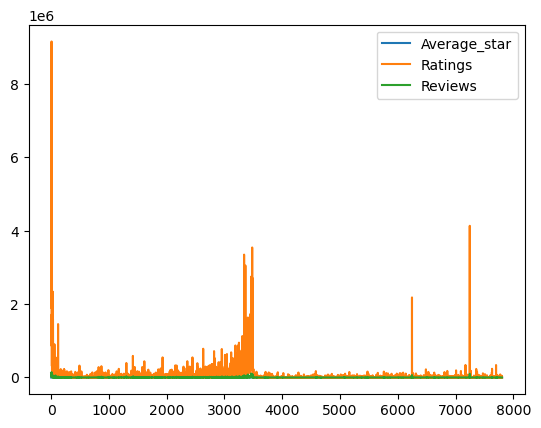

In [27]:
#Finding relation between thre features on book Rating, Reviews , n star 
df_plot = df.loc[:,["Average_star","Ratings","Reviews"]]
df_plot.plot()

In [28]:
#Observation : from this plot we can only find Ratings of the book is more Highlighted .

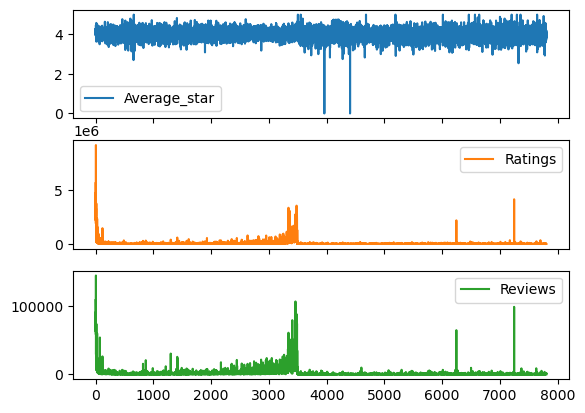

In [29]:
#subplots 
df_plot.plot(subplots = True)
plt.show()

In [30]:
#Observation :Average star rating is generally 4 star and raring n Reviews are directly correlated.

In [31]:
#Correlation of Numerical data
df.corr()

,Average_star,Ratings,Reviews,5_Star,4_Star,3_Star,2_Star,1_Star
Average_star,1.000000,0.062234,0.056058,0.084345,0.054505,0.016133,-0.007360,0.004800
Ratings,0.062234,1.000000,0.905620,0.972409,0.987283,0.937258,0.876682,0.889754
Reviews,0.056058,0.905620,1.000000,0.849788,0.919807,0.886503,0.844585,0.824787
5_Star,0.084345,0.972409,0.849788,1.000000,0.926776,0.831315,0.749668,0.791990
4_Star,0.054505,0.987283,0.919807,0.926776,1.000000,0.971352,0.915667,0.904003
3_Star,0.016133,0.937258,0.886503,0.831315,0.971352,1.000000,0.978130,0.945362
2_Star,-0.007360,0.876682,0.844585,0.749668,0.915667,0.978130,1.000000,0.975052
1_Star,0.004800,0.889754,0.824787,0.791990,0.904003,0.945362,0.975052,1.000000


In [32]:
#Observation : Rating and Reviews are directly correlated and considered.

<AxesSubplot:xlabel='Average_star', ylabel='Reviews'>

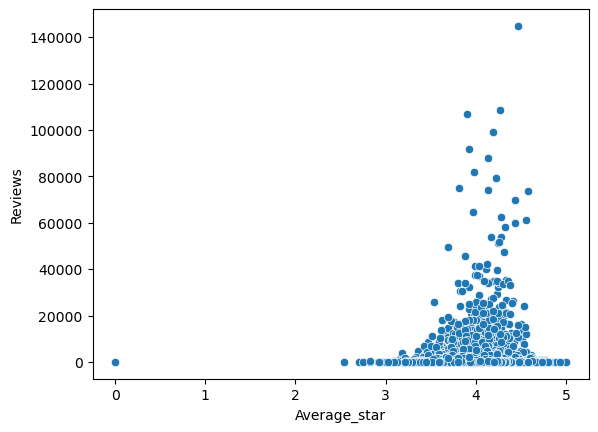

In [33]:
sns.scatterplot(data = df, x= "Average_star", y= "Reviews")

In [34]:
#Observation : Star Ratings are generally between 3 to 5 star .

In [35]:
df.head()


,Book_Name,Author,Average_star,Ratings,Reviews,5_Star,4_Star,3_Star,2_Star,1_Star
0,To Kill a Mockingbird,Harper Lee,4.27,5623473,108722,2927118,1669471,730317,192620,103947
1,1984,George Orwell,4.19,4134439,98891,1956290,1345678,588373,158757,85341
2,Fahrenheit 451,Ray Bradbury,3.97,2181792,64728,788776,777014,438256,123939,53807
3,Animal Farm,George Orwell,3.98,3521050,81746,1310631,1229834,676221,200989,103375
4,The Hobbit,J.R.R. Tolkien,4.28,3612605,62476,1930001,1047617,439072,118631,77284
